In [6]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

matplotlib.use("TkAgg")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [7]:
Ts = 1e-3
t0 = 0
t1 = 15
t = np.arange(t0, t1 + Ts, Ts)

N = len(t)

In [ ]:
x1_0 = -4.0
x2_0 = 4.0

x = np.zeros((N, 2))
P = np.zeros((N, 2, 2))
u = np.zeros((N, 1))

x[0, 0] = x1_0
x[0, 1] = x2_0

# From system and optimum criteria
A = np.array([[0, 1], [2, -1]])
B = np.array([[0], [1]])
Q = np.array([[1, 0], [0, 0.5]])
R = np.array([[0.25]])
R_inv = np.linalg.inv(R)

In [9]:
def dot_x1(x: np.ndarray, u: np.float64) -> np.float64:
    return x[1]

def dot_x2(x: np.ndarray, u: np.float64) -> np.float64:
    return 2 * x[0] - x[1] + u

def dot_P(P: np.ndarray) -> np.ndarray:
    return -A.T @ P - P @ A + P @ B @ R_inv @ B.T @ P - Q

In [10]:
eps = 1e-5
iters = 0
w = 0.99

while iters <= 1000:
    iters += 1
    print(f"Iteration {iters}...")
    
    u_old = u.copy()

    for k in range(N - 1):
        xp_1 = x[k, 0] + Ts * dot_x1(x[k], u[k])
        xp_2 = x[k, 1] + Ts * dot_x2(x[k], u[k])

        xp = np.vstack((xp_1, xp_2))

        x[k + 1, 0] = x[k, 0] + Ts / 2 * (dot_x1(x[k], u[k]) + dot_x1(xp, u[k + 1]))
        x[k + 1, 1] = x[k, 1] + Ts / 2 * (dot_x2(x[k], u[k]) + dot_x2(xp, u[k + 1]))

    for k in range(N - 1):
        P[N - 2 - k] = P[N - 1 - k] - Ts * dot_P(P[N - 1 - k])

    for k in range(N):
        u_new = -R_inv @ B.T @ P[k] @ (x[k].reshape(-1, 1))
        u[k] = w**iters * u[k] + (1 - w**iters) * u_new 

    print(x[len(x) - 1])

    if sum(np.abs(u - u_old)) - eps * sum(np.abs(u)) <= 0:
        break

Iteration 1...
[-4358678.94142112 -4358678.94142112]
Iteration 2...
[-2867969.71678905 -2852778.13584237]
Iteration 3...
[-439500.94156672 -404669.4232323 ]
Iteration 4...
[1790910.0220123  1829429.43082039]
Iteration 5...
[2712226.78349517 2724887.62581757]
Iteration 6...
[1912794.44354775 1878614.3785922 ]
Iteration 7...
[-24375.65286639 -95894.52376709]
Iteration 8...
[-1847105.90187604 -1913995.15717871]
Iteration 9...
[-2412751.38836166 -2425610.48849854]
Iteration 10...
[-1418706.50203352 -1357944.24834421]
Iteration 11...
[416402.36785267 519565.78901834]
Iteration 12...
[1857171.67586675 1936134.66157989]
Iteration 13...
[1995613.66545518 1993596.79233339]
Iteration 14...
[844236.19283801 757320.41166087]
Iteration 15...
[-729440.08120012 -845387.92918557]
Iteration 16...
[-1653614.79029476 -1720449.58700278]
Iteration 17...
[-1397621.04289622 -1370659.93722761]
Iteration 18...
[-279304.76004181 -179517.1226006 ]
Iteration 19...
[846767.45137231 948790.65074103]
Iteration 20...

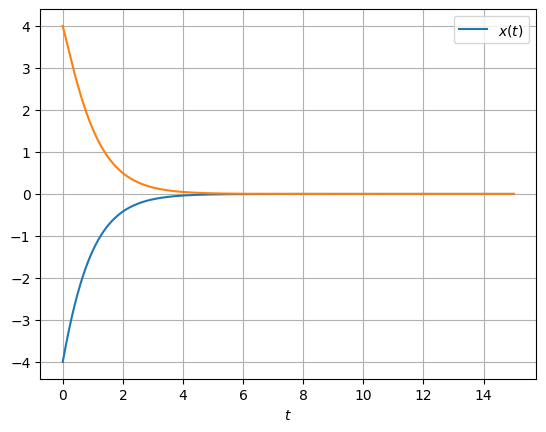

In [11]:
# plt.rcParams["text.usetex"] = True

plt.plot(t, x)
plt.grid()
plt.legend([r"$x(t)$"])
plt.xlabel(r"$t$")

plt.show()


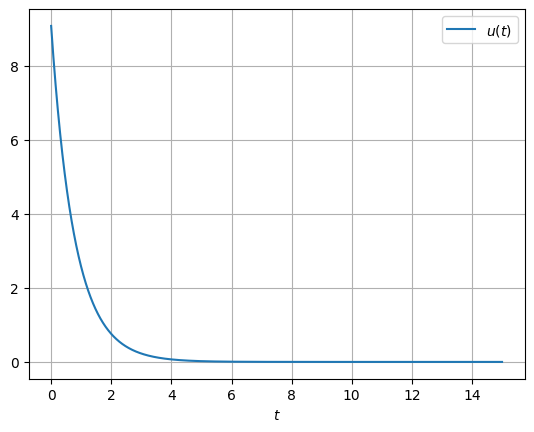

In [12]:
plt.plot(t, u)
plt.grid()
plt.legend([r"$u(t)$"])
plt.xlabel(r"$t$")

plt.show()
